# Social Media Mining: Support Vector Machines
### Vincent Malic - Spring 2018
## Module 5.1 Support Vector Machines (SVM)
* SVMs are mathematically intricate classification models that solve classification problems in a very intuitive, easy-to-gasp manner. 
* Be familiar with *what* SVMs are and *what they are doing*, but will not cover *how they do it*. 
* Given training data and labels, scikit-learn will perform mathematical calculations for us. 

### SVMs perform *classification* 
* Used in situations where the output is a finite set of labels. 
* In its most *basic* form, SVMs perform *binary* classification: they assign an input to one of two categories. 
* SVMs can easily be modified to handle multi-class problems, but we'll cover that later. 

### Iris dataset
* Use only sepal length and sepal width, and for binary classification, leave out *Virginica*. 
* Classifier makes a binary decision: it either *is* *I. Setosa*, or it isn't (which is another way of saying it's *I. versicolor.*

In [1]:
from sklearn.datasets import load_iris

X = load_iris().data
y = load_iris().target

# Import first 100 datapoints, not including I.Virginica
X, y = X[:100, :], y[:100] 

setosa_slength = X[:50, 0]
setosa_swidth = X[:50, 1]
versicolor_slength = X[50:, 0]
versicolor_swidth = X[50:, 1]

## Binary Classification with SVM
* In 2D feature space -Sepal length, Sepal width, depicted on a flat plot. 
* SVM finds a line that separates all the red data points from all the blue points. 
* Any new points above line classified as `Setosa` (red), points below line as `Versicolor`

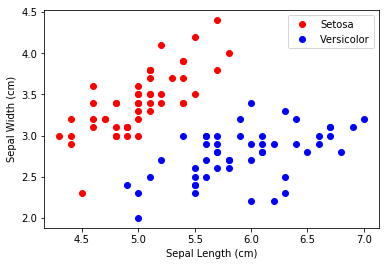

In [2]:
%matplotlib inline 
import matplotlib.pyplot as plt

plt.plot(setosa_slength, setosa_swidth, "ro", label="Setosa")
plt.plot(versicolor_slength, versicolor_swidth, "bo", label="Versicolor")
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Sepal Width (cm)")
plt.legend()
plt.show()

## Multi-feature classification with 3 features
* Classification by 3 features: sepal length, sepal width, petal length. 
* In 3-dimensional plot, SVM finds *2 dimensional plane* - that separates the groups. 
* In 4-dimensions, SVM finds *3 dimensional hyperplane* that separates the points in 4D space. * With 100 features, SVM finds a n-1 dimensional hyperplane that separates two categories. 

NOTE: In principle, SVM can find separating hyperplane in a high-dimensional space.

### SMV Classification using Scikit-Learn: SVC ("Support Vector Classifier")
* Import SVM factory method, make an instance of an SVM classifier, 
* Fit it using the ``fit`` method, Include *all four* of features per iris 
* P redict using the ``predict`` method.

#### Note: Pass argument to the factor function: ``kernel="linear"``

In [3]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

np.random.seed(3057)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

from sklearn.svm import SVC

clf = SVC(kernel="linear")
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(accuracy_score(y_test, y_pred))

1.0


### SVM model is trained on four-dimensional data
* SVM produced a 3-dim. hyperplane that separated *I. Setosa* from *I. Virginica*. 
* Returns 100% accuracy on the *unseen* test data.

## Linearly Separable
* Two categories were *linearly seperable*, that you could draw a line to separate them. 
* Real world data is often messier, not linearly separable 

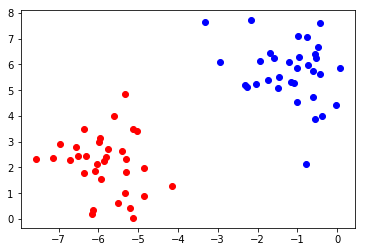

In [4]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=99, n_features=2, random_state=1234)
y = y.reshape(-1, 1)
d = np.append(X, y, axis=1)
cat1x = [x[0] for x in d if x[2]==1]
cat1y = [x[1] for x in d if x[2]==1]
cat0x = [x[0] for x in d if x[2]==0]
cat0y = [x[1] for x in d if x[2]==0]
plt.plot(cat0x, cat0y, "ro", cat1x, cat1y, "bo")
plt.show()

## SVM finds line optimally separates two clusters
* infinite number of lines that you could draw: there are lines at *many* angles that you could draw to cleanly separate these blobs. 
* SVM finds the one line that produces the "widest gutter" between itself and the two blobs. 

### What SVM does:
1. Find points in each cluster closest to the other blob, points known as "support vectors".
2. Find *the* line that is **maximially** distant from these support vectors.

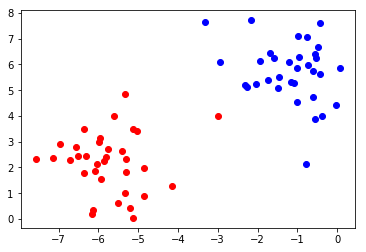

In [5]:
plt.plot(cat0x + [-3], cat0y+[4], "ro", cat1x, cat1y, "bo")

## Outliers and SVM Decision Boundary
* Add new red data point at coordinates $(-3, 4)$, and outlier red point 
* For SVM to find the "best" line, it threads line between red outlier and blue cluster. 
* Decision boundary is pushed far closer to blue blob than mass of the red blob. 

###  Misclassification and **Overfitting** 
* To accomodate red outlier, boundary line is pushed far closer to blue side 
* Tradeoff: extremely strict SVM accepts **no misclassifications**, may generalize poorly. 
* More "forgiving" SVM accepts some misclassifications for more generalizable line. 

## SVM Hyperparameter ``C`` = "cost"
* Conceptually ``C`` represents the penalty for every point on the "wrong" side of the line. 
* Each misclassification penalizes one point, SVM algorithm finds line that keeps cost as low as possible. 
* Value of ``C`` becomes more important with data that *isn't* linearly separable. 

### Default value for ``C`` is 1.0. 
* Low value of ``C`` (0.01) SVM accept more misclassifications as it finds a line
* High value of ``C`` (1000), SVM threads a line between two clusters with as few errors as possible 

You set a value of ``C`` when you create your classifier using the SVC factory function:
```python
clf = SVM(C=1000.0, kernel="linear") # A very unforgiving SVM
clf = SVM(C=0.0001, kernel="linear") # A very forgiving SVM
```
### More Complicated Example:
* SVM classifier has to make misclassification errors
* Experiment with different values of ``C`` to find the optimal line.
* Same ``C`` parameter applies regardless of feature dimensionality.

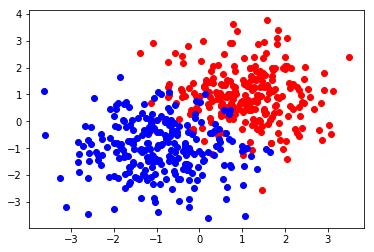

In [6]:
X, y = make_blobs(n_samples=500, n_features=2, random_state=1234, centers=[[1, 1], [-1, -1]])
y = y.reshape(-1, 1)
d = np.append(X, y, axis=1)
cat1x = [x[0] for x in d if x[2]==1]
cat1y = [x[1] for x in d if x[2]==1]
cat0x = [x[0] for x in d if x[2]==0]
cat0y = [x[1] for x in d if x[2]==0]
plt.plot(cat0x, cat0y, "ro", cat1x, cat1y, "bo")
plt.show()

# Kernels

## Rexpressing Data in Higher Dimensions
* With high-dimensional that defies linear separability, SVM searches for best separating hyperplane.
* Classifier needs to separate blue dots in outer ring from red dots in the inner ring. 
* Examples below [from Eric Kim](http://www.eric-kim.net/eric-kim-net/posts/1/kernel_trick.html)
<img src="http://ella.ils.indiana.edu/~vmalic/z639/tworings.png">

### Interesting approach: increasing the dimensionality of the data. 
* Each point has two features $(x, y)$: x-value, y-value. 
* Add third dimension and project 2D data into three dimensions 
* Representing each data point with *three coordinates* will be particularly useful if we do it like this: $(x, y, x^2 + y^2)$. 

The new coordinate in the third dim. is sum of first coordinate squared and the second coordinate squared. 

### Now plot the result in 3-dimensions:

<img src="http://ella.ils.indiana.edu/~vmalic/z639/tworings_sep.png">

### Re-expressing the data in *higher-dimensions* 
* Follows specific formula; transformed data is **not** linearly seperable in **2 dimensions** is now linearly seperable in **3 dimensions**.

### SVM dealing with $n$ dimensions, 
* SVM tries to find an $n-1$ hyperplane that separates the data. 
* In re-expressed data with 3 dimensions, SVM finds 3-1=2 dimensional hyperplane to separate the data: 2D hyperplane is just a plane. 
* Image on right shows you could insert a "sheet of paper" between the re-expressed blue and red groups. 

This is exactly what an SVM would do in this situation. 

We can actually back-transform the hyperplane onto the original 2-dimensional plot:

<img src="http://ella.ils.indiana.edu/~vmalic/z639/tworings_back.png">

#### Note: SVM plane in 3 dimensions is a circle in the original dimensionality. 
* Increasing the dimensionality of the data is a form of **adding non-linearity to SVMs**. 

# Enter the Kernel
* Given a dataset with $n$-dimensions, how do we express the higher dimensions? 
* How many dimensions do we need? If 3 didn't work, should we try 4? 10? 100? 
* Even if we did know how to re-express the data, this becomes computationally expensive. 

## **the kernel trick**. 
* [Eric Kim's blog post](http://www.eric-kim.net/eric-kim-net/posts/1/kernel_trick.html)
* Set of kernels that have become "standardized" in that they work well in many situations. 

### Kernels address the problems described above by: 
* Increase the dimensionality of the data in a computationally cheap way.  
* Scikit-learn offers: *radial basis function* RBF kernel and the *polynomial kernel*.
* New hyperparameter that we have to designate when initializing an SVM. 

```python
clf = SVC(kernel="linear") # The "standard" SVM. 
clf = SVC(kernel="rbf") # Radial basis function SVM
clf = SVC(kernel="poly", degree=2) # 2 degree polynomial 
```

### Kernel parameters
* ``RBF`` function is default kernel in scikit-learnEffective 
* ``kernel="linear"`` recommended as starting point, try rbf is data is not linearly separable.
* ``polynomial`` kernel adds *yet another* hyperparameter, the degree of the polynomial. 


# Multi-class classification 
* Scikit-learn promotes an SVM to multi-class problems through **one-vs-one** scheme. 
* With three classes (A, B, C) simply train multiple SVMs: A vs. B, A vs. C, and B vs. C. 
* When a new data point comes in, see what all 3 classifiers predict and choose the one that has the greatest margin; that is, choose the one where the point is "furthest away" from the decision boundary. 

## Note: if you have $n$ output classes: 
* The one-vs-one scheme will train $\frac{n(n-1)}{2}$ separate classifiers. 
* If you have a huge number of classes, this will become computationally expensive to compute. 

### Scikit-learn's SVM functionalities automatically handle multi-class problems. 
* If it notices there are more than two categories in your label vector ``y``, it adjusts accordingly.



# Visualizing Kernels
* Visualizing decision boundaries discovered by a multi-class SVM on Iris data using different kernels. 
* In case of ``rbf`` and ``poly`` kernels, remember that in these instances the data was re-expressed in higher dimensions, so the decision boundaries you see are the ones that are projected back into two dimensions. 
* As we saw above, this allows non-linear boundaries, which is why the decision boundaries are curved in those instances.

### Upper right visualization of "LinearSVC (Linear Kernel)" 
* Refers to a second implementation of linear SVMs that scikit-learn has. 
* Unlikely that we'll encounter data where the difference between ``SVC(kernel="linear")`` and ``LinearSVC`` will be significant. 
* Read about the distinction on scikit-learn's documentation.


<img src="http://ella.ils.indiana.edu/~vmalic/z639/kernels.png">